# **GLOBAL AI HUB INTERNATIONAL BOOTCAMP PROJECT**

## Medical Cost Analysis

### 1.Defining the Question

#### a) Specifying the Data Analytical Question

In this project, we will be trying to develop an end-to-end data science application using the
dataset given. The aim of the project is to estimate the approximate cost of a person's
health insurance based on the given variables. 

Approach: Regression Problem

#### b) Defining the Metric of Success

A prediction system that estimates the approximate cost of a person's
health insurance

#### c) Understanding the Context

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
Details of the features found in the dataset:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance



#### d) Recording the Experimental Design

1. Loading Data
2. Data Cleaning
3. Exploratory Data Analysis
4. Creating and Training ML models
5. Model Selection 
6. Hyper-parameter tuning
7. Model Evaluation

#### e) Data Relevance

The data that was used for prediction was obtained from a reliable open datasource; Kaggle.

### 2. Reading the Data

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the data 
data = pd.read_csv('insurance.csv')

# Previewing top of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Checking the shape of the data

data.shape

(1338, 7)

### 3. Data Cleaning

In [4]:
# Checking for missing values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Checking for duplicates
data.duplicated().sum()

1

In [6]:
# Dropping the duplicate record
data.drop_duplicates( inplace=True)

# Confirmimg duplicaate record has been dropped
data.duplicated().sum()

0

In [7]:
# Checking column datatypes
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# Checking column names
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### 4.EDA

In [9]:
# Statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


<Figure size 576x1008 with 0 Axes>

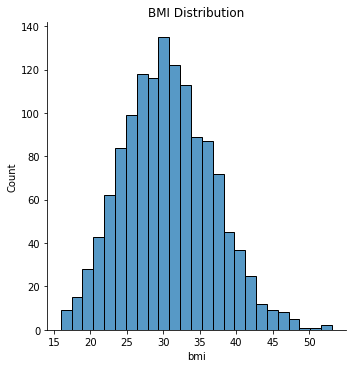

'\n Normal BMI falls within the range of 18.5 to 24.9. From the distribution, most people in our analysis have a BMI above the normal range. Most people are overweight\n '

In [10]:
# Visualizing BMI distribution
plt.figure(figsize=(8,14))
sns.displot(data['bmi'])
plt.title("BMI Distribution")
plt.show()


'''
 Normal BMI falls within the range of 18.5 to 24.9. From the distribution, most people in our analysis have a BMI above the normal range. Most people are overweight
 '''


<AxesSubplot:xlabel='smoker', ylabel='charges'>

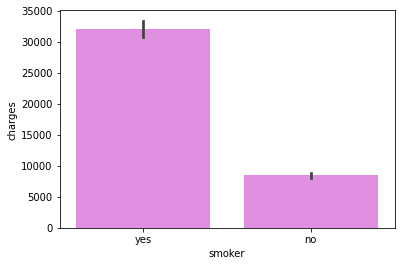

In [11]:
# Visualizing r/ship between "smoker" and "charges"
sns.barplot(x='smoker', y = 'charges', data = data, color = 'violet')

# Individual's that smoke are charged higher medical costs

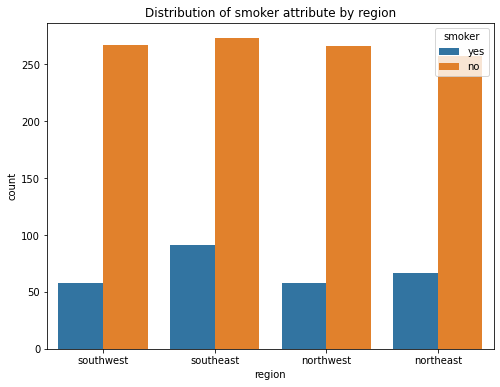

In [12]:
# Visualizing r/ship between "smoker" and "region"
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='region', data = data, hue = 'smoker')
plt.title('Distribution of smoker attribute by region')
plt.show()


# From the figure, the dataset contains more non-smokers all through the four regions 
# The Southeast region has most smokers compared to the other three regions 


<AxesSubplot:xlabel='sex', ylabel='bmi'>

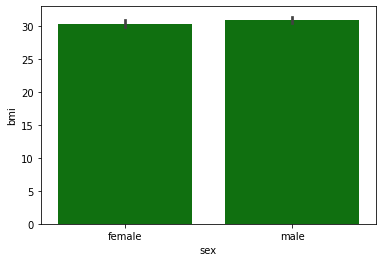

In [13]:
# Visualizing r/ship between "sex" and "BMI"
sns.barplot(x='sex', y = 'bmi',data = data, color = 'green')

# Distribution of BMI by gender is relatively the same

In [14]:
# Finding "region" with most  "children"
data[['region', 'children']].groupby('region').sum().sort_values(by='children', ascending=False).head()

# Southeast region has the most children at a count of 382.


,children
region,
southeast,382
northwest,373
southwest,371
northeast,339


<AxesSubplot:xlabel='age', ylabel='bmi'>

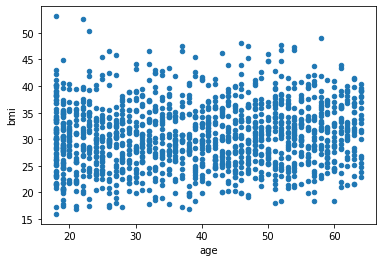

In [15]:
# Visualizing r/ship between "age" and "BMI"
data.plot.scatter('age', 'bmi')

<AxesSubplot:xlabel='children', ylabel='bmi'>

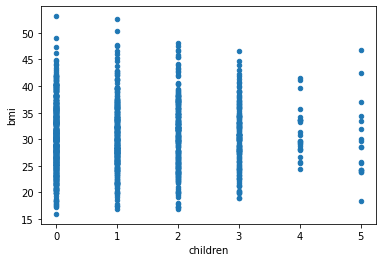

In [16]:
# Visualizing r/ship between "BMI" and "children"
data.plot.scatter('children', 'bmi')

AxesSubplot(0.125,0.125;0.775x0.755)


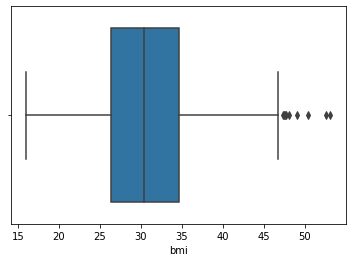

In [17]:
# Checking for outlier in the BMI variable
print(sns.boxplot(x = data['bmi']))

# The variable 'bmi' has outliers. However, we shall not drop them as they are valid. Individual's bmi's can vary greatly from each other.


<AxesSubplot:xlabel='bmi', ylabel='charges'>

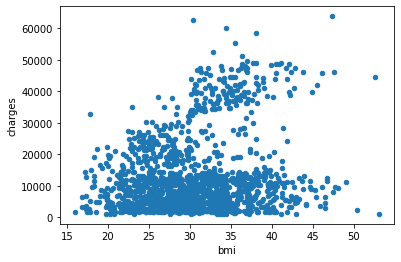

In [18]:
# Visualizing r/ship between "BMI" and "charges"
data.plot.scatter('bmi', 'charges')

# Charges are low for individual's with normal and below BMI range

<AxesSubplot:xlabel='region', ylabel='bmi'>

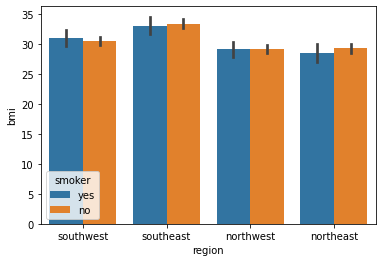

In [19]:
# Relationship between "region", "smoker" and "BMI"
sns.barplot(x = 'region', y = 'bmi', data = data, hue = 'smoker')

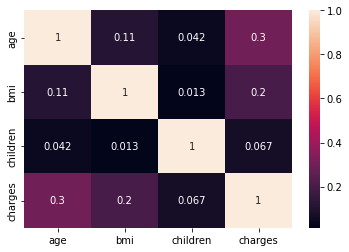

In [20]:
# Visualizing correlation of features

sns.heatmap(data.corr(), annot = True)
plt.show()

### 5. Creating and Training ML Models

In [21]:
# Encoding the categorical columns
encoder = OneHotEncoder()

# Converting type of columns to category
data['sex']=data['sex'].astype('category')
data['smoker']=data['smoker'].astype('category')
data['region']=data['region'].astype('category')

#Assigning numerical values and storing in new columns
data['sex_new']=data['sex'].cat.codes
data['smoker_new']=data['smoker'].cat.codes 
data['region_new']=data['region'].cat.codes 
    

# Dropping the categorical columns 
data.drop(columns = ['sex', 'region', 'smoker'], axis = 1, inplace=True)

#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we have huge  number of categorical variables
'''
enc_data=pd.DataFrame(encoder.fit_transform(data[['sex_new','smoker_new', 'region_new']]).toarray())
  
#Merge with main
final_data=data.join(enc_data)
final_data



,age,bmi,children,charges,sex_new,smoker_new,region_new,0,1,2,3,4,5,6,7
0,19,27.900,0,16884.92400,0,1,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1,0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,18,31.920,0,2205.98080,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,18,36.850,0,1629.83350,0,0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1336,21,25.800,0,2007.94500,0,0,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
# Defining the dependent and independent variables
X = data.drop(['charges'],axis=1)
y = data.loc[:, 'charges']

# Splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# Creating a linear regression object
linear_model = LinearRegression()

# Creating a decision tree object
tree_model = DecisionTreeRegressor()

# Creating a random forest object
forest_model = RandomForestRegressor()

# Creating an object using the MLPRegressor() class
neural_model = MLPRegressor()

In [24]:
# Training the linear model
linear_model.fit(X_train, y_train)

# Training the Decision tree model
tree_model.fit(X_train, y_train)

# Training the random forest model
forest_model.fit(X_train, y_train)

# Train the Neural Network model
neural_model.fit(X_train, y_train)

MLPRegressor()

In [25]:
# Making prediction using the test dataset on linear regression model
linear_pred = linear_model.predict(X_test)

# Making prediction using the test dataset on Decision Tree model
tree_pred = tree_model.predict(X_test)

# Making prediction using the test dataset on random forest model
forest_pred = forest_model.predict(X_test)

# Making prediction using the test dataset on Neural Network model
neural_pred = neural_model.predict(X_test)


In [32]:
# Using cross validation to examine performance for:
# (i)Linear model

linear_accuracy = cross_val_score(linear_model, X, y, cv =10)
print(f"The accuracy of the linear model is: {np.mean(linear_accuracy)*100:0.2f} %")

# (ii)Decision tree model
tree_accuracy = cross_val_score(tree_model, X, y,  cv =10)
print(f"The accuracy of the Decision Tree model is: {np.mean(tree_accuracy)*100:0.2f} %")

# (iii)Random Forest model
forest_accuracy = cross_val_score(forest_model, X, y, cv =10)
print(f"The accuracy of the Random Forest model is: {np.mean(forest_accuracy)*100:0.2f} %")

# (iv)Neural Networks model
neural_accuracy = cross_val_score(neural_model, X, y, cv =10)
print(f"The accuracy of the Neural Networks model is: {np.mean(neural_accuracy)*100:0.2f} %")


The accuracy of the linear model is: 74.46 %
The accuracy of the Decision Tree model is: 70.50 %
The accuracy of the Random Forest model is: 83.23 %
The accuracy of the Neural Networks model is: 6.52 %


- The Random Forest model performs best with an accuracy score of 83.2%

### 6.Hyper-Parameter Optimization

In [27]:
# Using Gridsearch to optimize the parameters of the random forest model selected
# Creating parameter grid

parameter_grid = { 'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

# Instantiating the grid search model
grid_search = GridSearchCV(estimator = forest_model, param_grid = parameter_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fitting grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [28]:
best_grid = grid_search.best_estimator_
prediction = best_grid.predict(X_test)


### 7.Model Evaluation

In [29]:
errors = abs(prediction - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 2737.1613 degrees.
Accuracy = 72.26%.


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error: 2737.1612856258657
Mean Squared Error: 24166924.627510983
Root Mean Squared Error: 4915.986638255945
